# HaMeR Demo Notebook
This a demo notebook for our paper "Reconstructing Hands in 3D with Transformers".

<p align="left"><img src="https://github.com/geopavlakos/HaMeR/raw/main/assets/teaser.jpg" width="800"></p>

Project webpage: https://geopavlakos.github.io/hamer/

Github repo: https://github.com/geopavlakos/hamer



In [8]:
# Clone repo
!git clone --recursive https://github.com/geopavlakos/hamer.git
%cd hamer

Cloning into 'hamer'...
remote: Enumerating objects: 268, done.
remote: Counting objects: 100% (113/113), done.
remote: Compressing objects: 100% (66/66), done.
remote: Total 268 (delta 72), reused 47 (delta 47), pack-reused 155 (from 1)
Receiving objects: 100% (268/268), 3.95 MiB | 9.16 MiB/s, done.
Resolving deltas: 100% (106/106), done.
Submodule 'third-party/ViTPose' (https://github.com/ViTAE-Transformer/ViTPose.git) registered for path 'third-party/ViTPose'
Cloning into '/content/hamer/third-party/ViTPose'...
remote: Enumerating objects: 1859, done.        
remote: Counting objects: 100% (1041/1041), done.        
remote: Compressing objects: 100% (316/316), done.        
remote: Total 1859 (delta 794), reused 725 (delta 725), pack-reused 818 (from 1)        
Receiving objects: 100% (1859/1859), 10.75 MiB | 18.16 MiB/s, done.
Resolving deltas: 100% (958/958), done.
Submodule path 'third-party/ViTPose': checked out 'd5216452796c90c6bc29f5c5ec0bdba94366768a'
/content/hamer


In [9]:
# Install dependencies
!pip install torch
!pip install -e .[all]
!pip install -v -e third-party/ViTPose

Obtaining file:///content/hamer
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/facebookresearch/detectron2 to /tmp/pip-install-x_0kgvx1/detectron2_9c3c4c27869a414e91078e98570a3444
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2 /tmp/pip-install-x_0kgvx1/detectron2_9c3c4c27869a414e91078e98570a3444
  Resolved https://github.com/facebookresearch/detectron2 to commit a1ce2f956a1d2212ad672e3c47d53405c2fe4312
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/mattloper/chumpy to /tmp/pip-install-x_0kgvx1/chumpy_00b7c611f5f241dcb9987bb6b6d714da
  Running command git clone --filter=blob:none --quiet https://github.com/mattloper/chumpy /tmp/pip-install-x_0kgvx1/chumpy_00b7c611f5f241dcb9987bb6b6d714da
  Resolved https://github.com/mattloper/chumpy to commit 580566eafc9ac68b2614b64d6f7aaa84eebb70da
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.3/313.3 kB 14.4 

In [10]:
# Get HaMeR model
!bash fetch_demo_data.sh
!wget https://github.com/JonathanLehner/Colab-collection/releases/download/MANO/mano_v1_2.zip
!unzip mano_v1_2.zip
!mv mano_v1_2/models/MANO_RIGHT.pkl _DATA/data/mano/
%rm -r mano_v1_2

Downloading...
From (original): https://drive.google.com/uc?id=1mv7CUAnm73oKsEEG1xE3xH2C_oqcFSzT
From (redirected): https://drive.google.com/uc?id=1mv7CUAnm73oKsEEG1xE3xH2C_oqcFSzT&confirm=t&uuid=cc5f7446-1ecf-407f-bb0b-08b6390a6f39
To: /content/hamer/hamer_demo_data.tar.gz
100% 6.04G/6.04G [01:07<00:00, 89.8MB/s]
_DATA/
_DATA/vitpose_ckpts/
_DATA/vitpose_ckpts/vitpose+_huge/
_DATA/vitpose_ckpts/vitpose+_huge/wholebody.pth
_DATA/data/
_DATA/data/mano_mean_params.npz
_DATA/data/mano/
_DATA/hamer_ckpts/
_DATA/hamer_ckpts/model_config.yaml
_DATA/hamer_ckpts/dataset_config.yaml
_DATA/hamer_ckpts/checkpoints/
_DATA/hamer_ckpts/checkpoints/hamer.ckpt
--2025-08-29 20:48:06--  https://github.com/JonathanLehner/Colab-collection/releases/download/MANO/mano_v1_2.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://release-assets.githubusercontent.com/github-pr

In [3]:
# 1) Mount Drive and point IMG_DIR to a Drive folder with your images
from google.colab import drive
drive.mount('/content/drive')

# e.g., put images in Drive at: /MyDrive/hamer_inputs/
IMG_DIR = "/content/drive/MyDrive/hamer_inputs"

Mounted at /content/drive


In [ ]:
#IMG_DIR = "/content/hamer/my_images"
!python demo.py --img_folder "{IMG_DIR}" --out_folder "/content/drive/MyDrive/hamer_outputs" \
                --batch_size 16 --side_view --save_mesh --full_frame


/usr/local/lib/python3.12/dist-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)
apex is not installed
apex is not installed
apex is not installed
/usr/local/lib/python3.12/dist-packages/mmcv/cnn/bricks/transformer.py:27: UserWarning: Fail to import ``MultiScaleDeformableAttention`` from ``mmcv.ops.multi_scale_deform_attn``, You should install ``mmcv-full`` if you need this module. 
  warnings.warn('Fail to import ``MultiScaleDeformableAttention`` from '
Use load_from_local loader
The model and loaded state dict do not match exactly

unexpected key in source state_dict: backbone.blocks.0.mlp.experts.0.weight, backbone.blocks.0.mlp.experts.0.bias, backbone.blocks.0.mlp.experts.1.weight, backbone.blocks.0.mlp.experts.1.bias, backbone.blocks.0.mlp.experts.2.weight, backbone.blocks.0.mlp.experts.2.b

Using run folder:
  /content/drive/MyDrive/hamer_outputs
  (462 OBJ files found here)

Preview (first 8):
   frame_001_0.obj
   frame_002_0.obj
   frame_003_0.obj
   frame_004_0.obj
   frame_005_0.obj
   frame_006_0.obj
   frame_007_0.obj
   frame_008_0.obj
... (last 8):
   frame_224_1.obj
   frame_225_1.obj
   frame_226_1.obj
   frame_227_1.obj
   frame_228_1.obj
   frame_229_1.obj
   frame_230_1.obj
   frame_231_1.obj


/tmp/ipython-input-1013239632.py:39: DeprecationWarning: Please import `csc_matrix` from the `scipy.sparse` namespace; the `scipy.sparse.csc` namespace is deprecated and will be removed in SciPy 2.0.0.
  mano = pickle.load(f, encoding="latin1")



Frame number stats: min=0, max=1, unique=2, median Δ=0.0
Initial median (deg) before zeroing over first 10 frames: 27.98
Saved: /content/drive/MyDrive/hamer_outputs/index_mcp_bend_deg_from_mesh_sorted_zeroed.csv


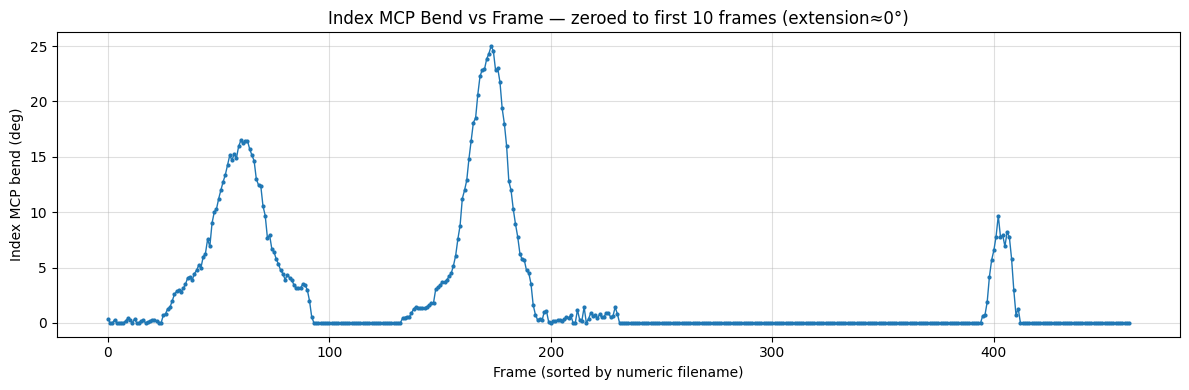

In [15]:
import os, re, glob, pickle, collections
import numpy as np, pandas as pd, matplotlib.pyplot as plt

# ---------- PATHS ----------
ROOT_DRIVE = "/content/drive/MyDrive/hamer_outputs"              # your Drive root with runs inside
MANO_PKL   = "/content/hamer/_DATA/data/mano/MANO_RIGHT.pkl"     # confirmed path from your check

# ---------- DISCOVER RUNS + PICK ONE ----------
all_objs = glob.glob(os.path.join(ROOT_DRIVE, "**", "*.obj"), recursive=True)
if not all_objs:
    raise FileNotFoundError(f"No .obj files found under {ROOT_DRIVE}. Make sure you ran with --save_mesh.")

by_parent = collections.defaultdict(list)
for p in all_objs:
    by_parent[os.path.dirname(p)].append(p)

# Pick the parent directory with the MOST .obj files (usually the run you care about)
run_dir, files = max(by_parent.items(), key=lambda kv: len(kv[1]))
print(f"Using run folder:\n  {run_dir}\n  ({len(files)} OBJ files found here)")

# ---------- ROBUST NUMERIC SORT ----------
def frame_number(path_or_name):
    # Use the LAST integer in the filename as the frame index; fallback -1
    base = os.path.basename(path_or_name)
    nums = re.findall(r'\d+', base)
    return int(nums[-1]) if nums else -1

files = sorted(files, key=lambda p: (frame_number(p), os.path.basename(p).lower()))

print("\nPreview (first 8):")
for p in files[:8]:
    print("  ", os.path.relpath(p, ROOT_DRIVE))
print("... (last 8):")
for p in files[-8:]:
    print("  ", os.path.relpath(p, ROOT_DRIVE))

# ---------- LOAD MANO REGRESSOR ----------
with open(MANO_PKL, "rb") as f:
    mano = pickle.load(f, encoding="latin1")
Jreg = mano["J_regressor"]
Jreg = Jreg.toarray() if hasattr(Jreg, "toarray") else np.asarray(Jreg)
VCOUNT = Jreg.shape[1]  # usually 778

# ---------- READ VERTICES ----------
def load_vertices(path):
    vs = []
    with open(path, "r") as fh:
        for line in fh:
            if line.startswith("v "):
                _, x, y, z, *rest = line.strip().split()
                vs.append((float(x), float(y), float(z)))
    return np.asarray(vs, dtype=np.float32)

verts, names, kept_paths = [], [], []
bad = 0
for p in files:
    V = load_vertices(p)
    if V.shape == (VCOUNT, 3):
        verts.append(V)
        names.append(os.path.basename(p))
        kept_paths.append(p)
    else:
        bad += 1
if bad:
    print(f"\nSkipped {bad} file(s) with unexpected vertex count (expected {(VCOUNT,3)}).")

if not verts:
    raise RuntimeError("No valid MANO meshes after filtering; check topology or MANO file.")

verts = np.stack(verts, axis=0)                 # (N, 778, 3)
joints = np.einsum('jv,nvk->njk', Jreg, verts)  # (N, 16, 3) MANO 16-joint set

# ---------- ANGLE: Index MCP (use metacarpal direction WRIST→MCP) ----------
# MANO 16-joint layout (common): 0 wrist;
# 1-3 index (MCP,PIP,DIP); 4-6 middle; 7-9 pinky; 10-12 ring; 13-15 thumb
WRIST, INDEX_MCP, INDEX_PIP = 0, 1, 2

v_prox = joints[:, INDEX_PIP, :] - joints[:, INDEX_MCP, :]        # MCP→PIP (prox phalanx)
v_meta_wrist = joints[:, INDEX_MCP, :] - joints[:, WRIST, :]       # WRIST→MCP (along metacarpal)

def rowwise_angle(a, b):
    an = np.linalg.norm(a, axis=1); bn = np.linalg.norm(b, axis=1)
    denom = an * bn
    cosang = np.full(a.shape[0], np.nan, dtype=np.float32)
    good = denom > 0
    cosang[good] = (a[good] * b[good]).sum(axis=1) / denom[good]
    np.clip(cosang, -1.0, 1.0, out=cosang)
    return np.degrees(np.arccos(cosang))

# Compute both orientations and choose the one with smaller initial median
cand1 = rowwise_angle(v_prox,  v_meta_wrist)
cand2 = rowwise_angle(v_prox, -v_meta_wrist)

init_n = min(10, len(cand1))  # calibration window size
init_slice = slice(0, init_n)
mcp_deg = cand1 if np.nanmedian(cand1[init_slice]) <= np.nanmedian(cand2[init_slice]) else cand2

# Optional: zero to the first few frames (assumed neutral/extended)
zero = np.nanmedian(mcp_deg[init_slice])
mcp_deg0 = np.clip(mcp_deg - zero, 0, None)

# ---------- QUICK QA ----------
# Compute frame numbers ONLY for the kept files (aligns with names)
fn = np.array([frame_number(n) for n in names])
if np.all(fn >= 0):
    jumps = np.diff(fn)
    print("\nFrame number stats:",
          f"min={fn.min()}, max={fn.max()}, unique={len(np.unique(fn))}, "
          f"median Δ={np.median(jumps) if len(jumps) else 'NA'}")
print(f"Initial median (deg) before zeroing over first {init_n} frames: {float(np.nanmedian(mcp_deg[init_slice])):.2f}")

# ---------- SAVE + PLOT ----------
out_csv = os.path.join(run_dir, "index_mcp_bend_deg_from_mesh_sorted_zeroed.csv")
pd.DataFrame({
    "file": names,
    "frame_num": fn,
    "index_mcp_deg_raw": mcp_deg,
    "index_mcp_deg_zeroed": mcp_deg0
}).to_csv(out_csv, index=False)
print("Saved:", out_csv)

plt.figure(figsize=(12,4))
plt.plot(mcp_deg0, marker="o", ms=2, lw=1)
plt.xlabel("Frame (sorted by numeric filename)"); plt.ylabel("Index MCP bend (deg)")
plt.title(f"Index MCP Bend vs Frame — zeroed to first {init_n} frames (extension≈0°)")
plt.grid(True, alpha=0.4); plt.tight_layout(); plt.show()


In [ ]:
from IPython.display import Image, display
import os

out_folder = "/content/hamer/out_myimgs"   # change this to match your --out_folder
output_images = [os.path.join(out_folder, i) for i in os.listdir(out_folder) if i.endswith(".jpg")]

for img in output_images:
    display(Image(img))

In [ ]:
# run hamer on a folder of images
!python demo.py \
--img_folder example_data --out_folder demo_out \
--batch_size=48 --side_view --save_mesh

apex is not installed
apex is not installed
apex is not installed
/usr/local/lib/python3.10/dist-packages/mmcv/cnn/bricks/transformer.py:27: UserWarning: Fail to import ``MultiScaleDeformableAttention`` from ``mmcv.ops.multi_scale_deform_attn``, You should install ``mmcv-full`` if you need this module. 
  warnings.warn('Fail to import ``MultiScaleDeformableAttention`` from '
model_final_f05665.pkl: 2.77GB [00:19, 143MB/s]                
Use load_from_local loader
The model and loaded state dict do not match exactly

unexpected key in source state_dict: backbone.blocks.0.mlp.experts.0.weight, backbone.blocks.0.mlp.experts.0.bias, backbone.blocks.0.mlp.experts.1.weight, backbone.blocks.0.mlp.experts.1.bias, backbone.blocks.0.mlp.experts.2.weight, backbone.blocks.0.mlp.experts.2.bias, backbone.blocks.0.mlp.experts.3.weight, backbone.blocks.0.mlp.experts.3.bias, backbone.blocks.0.mlp.experts.4.weight, backbone.blocks.0.mlp.experts.4.bias, backbone.blocks.0.mlp.experts.5.weight, backbone.b

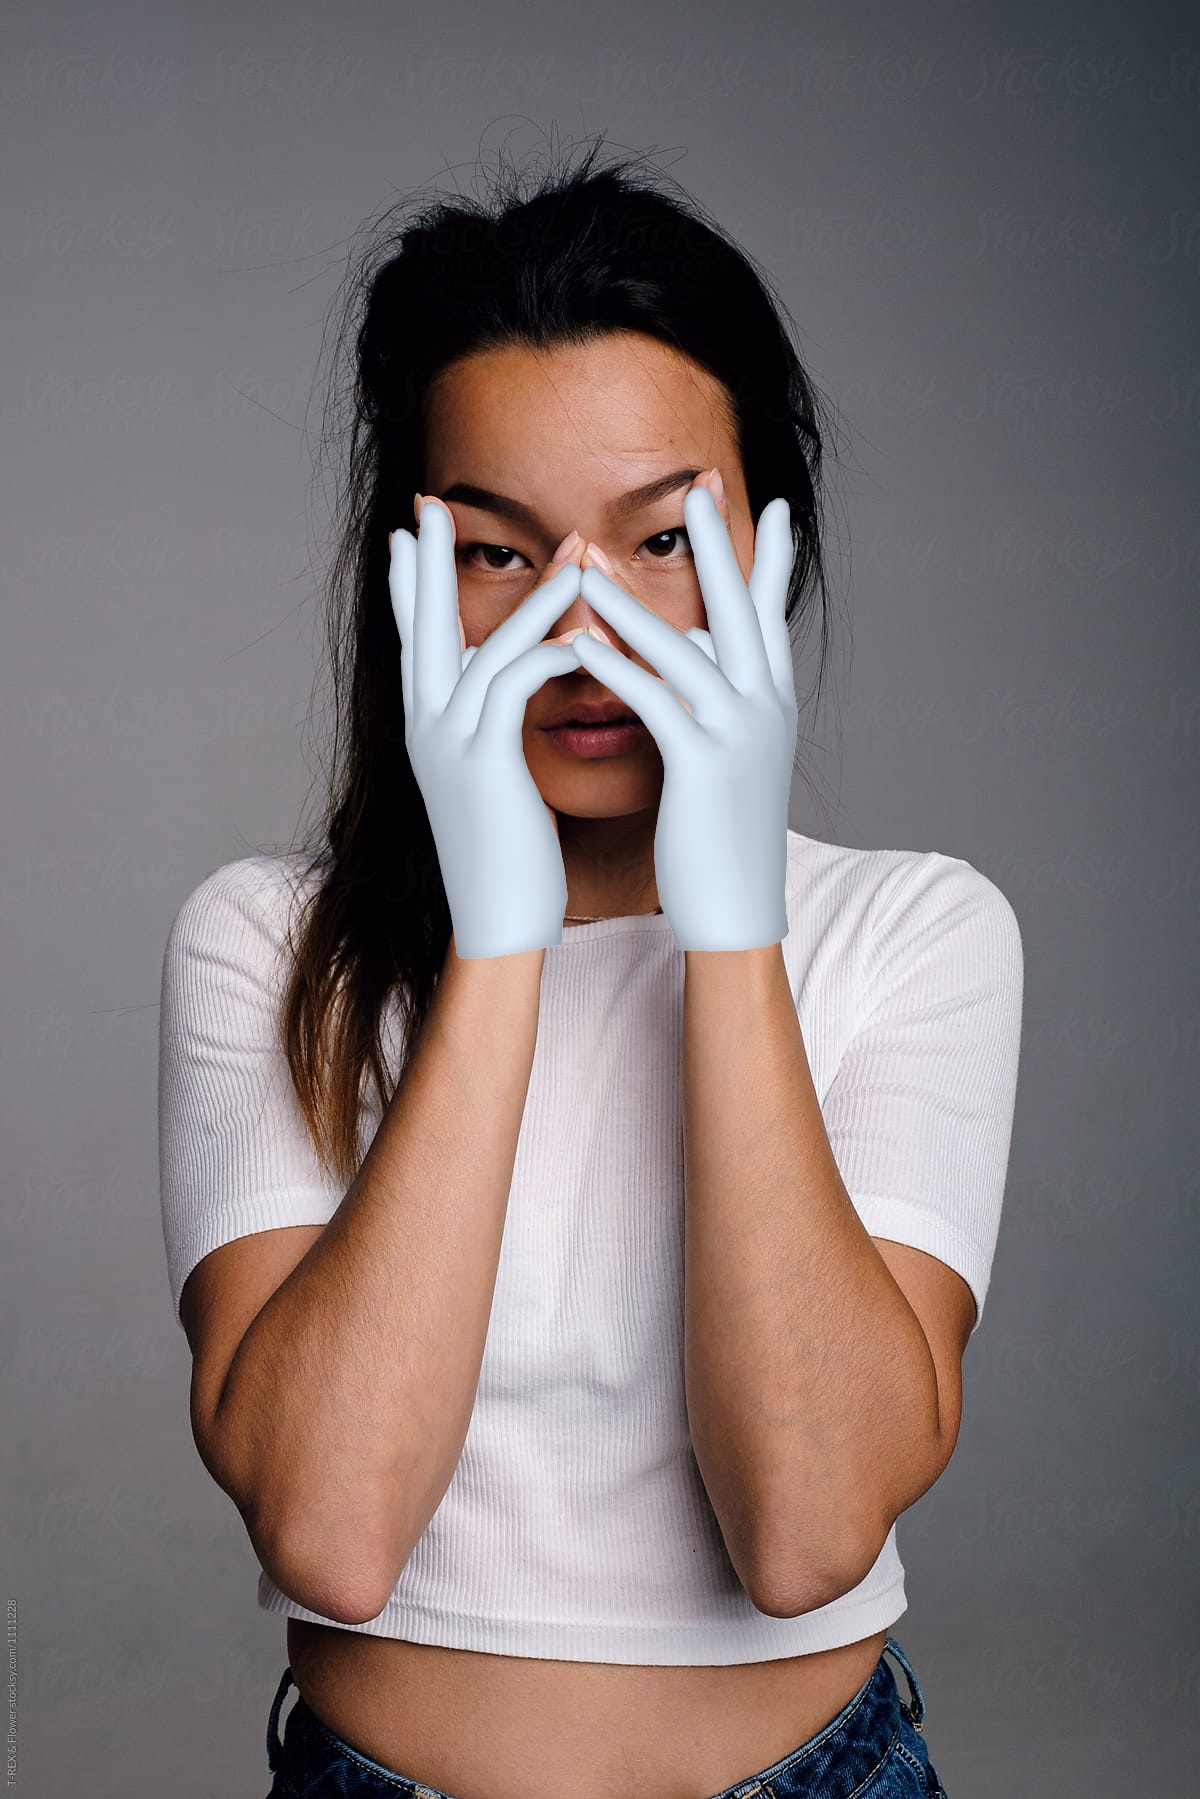

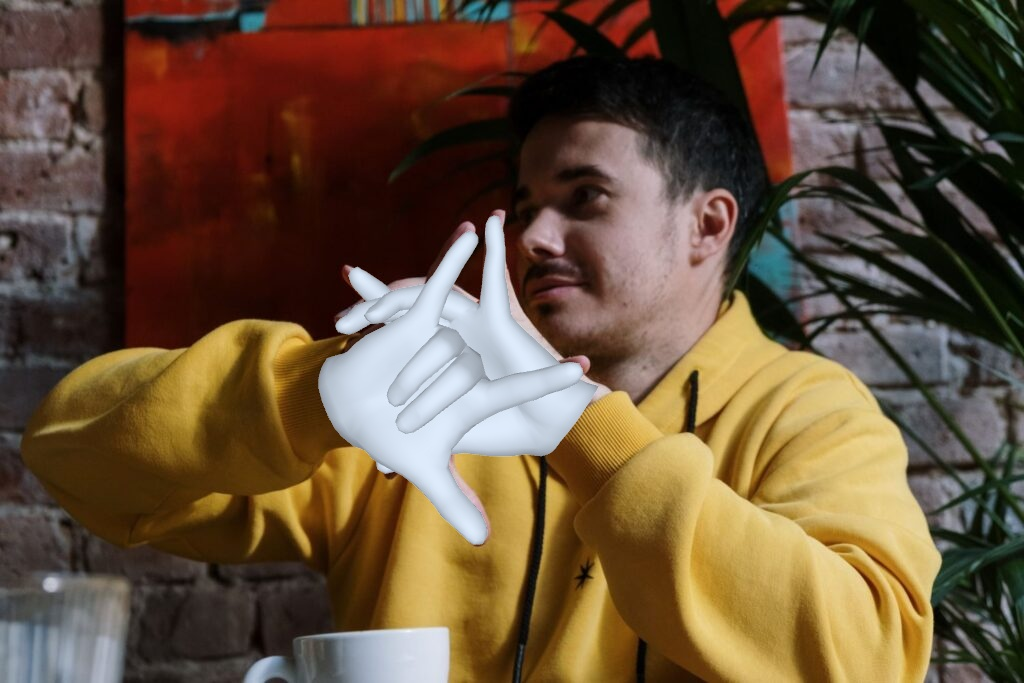

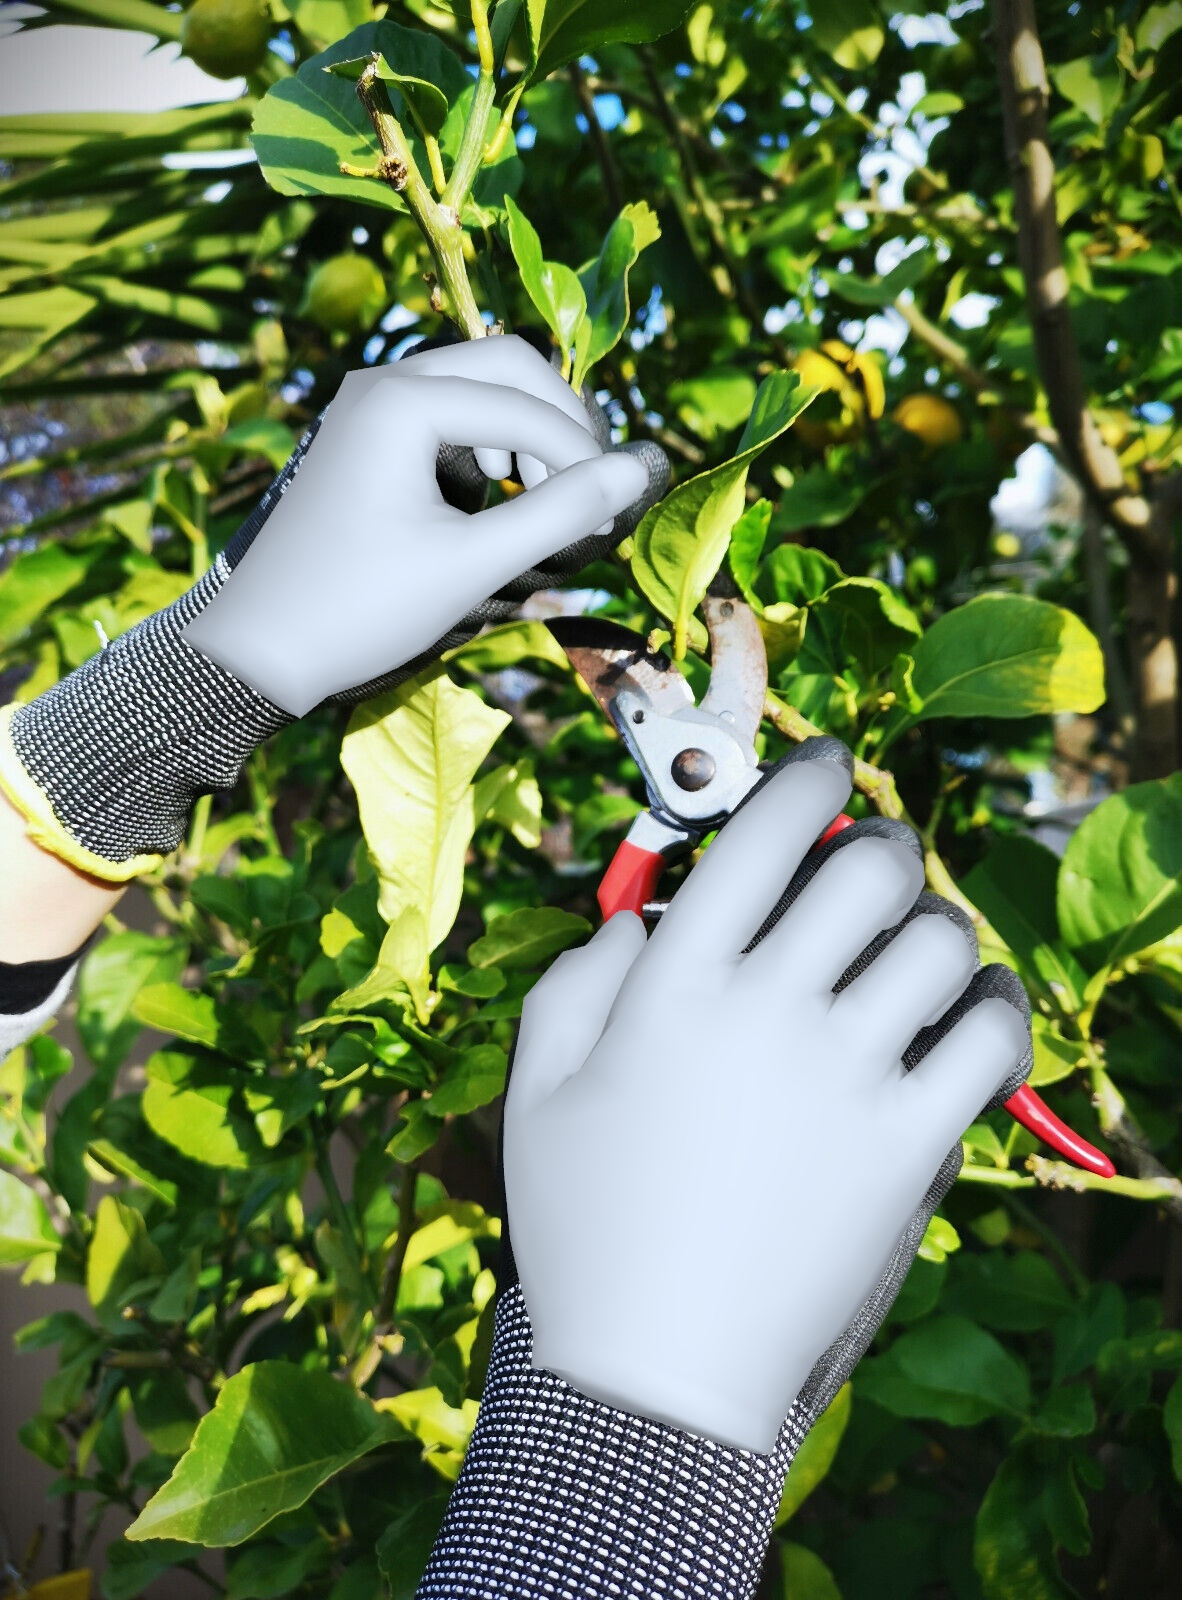

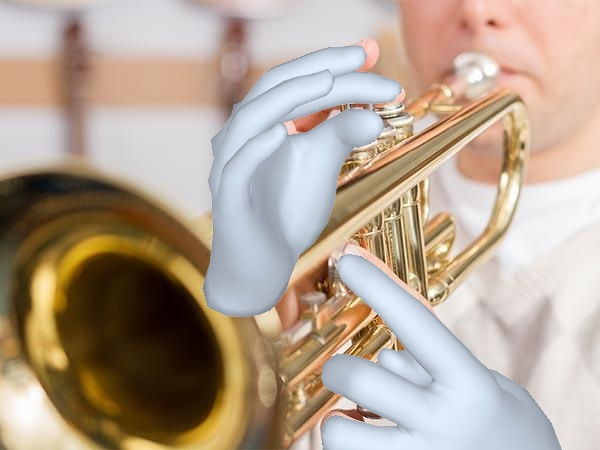

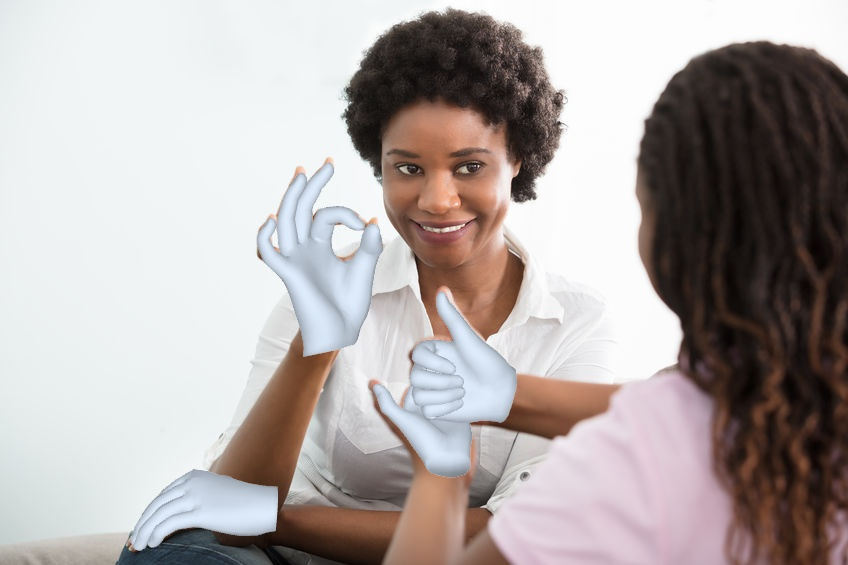

In [ ]:
from IPython.display import Image, display
import os
# https://colab.research.google.com/drive/1Ex4gE5v1bPR3evfhtG7sDHxQGsWwNwby?usp=sharing
output_images = ["demo_out/" + i for i in os.listdir("demo_out/") if ".jpg" in i]
for img in output_images:
  display(Image(img))